# **CAS M6 - Part II**

Filipe Maximiano Sousa & Laura Cunha Silva 



*   Recurrent neural network (RNN) to predict dog activity

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
## for data
import numpy as np
import pandas as pd
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for geospatial
import folium
import geopy


In [3]:
## for deep learning
!pip install minisom
import minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10608 sha256=1255b0794abfc51dbb7613962379710f92057577f6c70e114209d28b22f9e490
  Stored in directory: /root/.cache/pip/wheels/b4/aa/7a/d9a88098f7877aa95dd4f227fe614f75773654baa39b47bba6
Successfully built minisom


Import data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/CAS M6_work/catlog_D075_clean.csv',delimiter=',') 
df

,Date,Time,Latitude,Longitude,Altitude,Satellites,HDOP,PDOP,Temperature..C.,Speed..km.h.,...,A,C,B,A_lon,A_lat,C_lon,C_lat,angle,angle_deg,angle_deg_pos
0,2019-01-26,00:16:01,1.713847,33.629148,1072,8,1.0,1.3,30,1.852,...,"33.6290067 , 1.71402","33.6290483 , 1.714125","33.6291483 , 1.7138467",33.629007,1.714020,33.629048,1.714125,-0.340112,-19.486974,19.486974
1,2019-01-26,00:31:07,1.714125,33.629048,1028,7,1.0,1.4,30,0.000,...,"33.6291483 , 1.7138467","33.6291517 , 1.7139767","33.6290483 , 1.714125",33.629148,1.713847,33.629152,1.713977,0.263911,15.120966,15.120966
2,2019-01-26,00:46:49,1.713977,33.629152,1094,10,0.8,1.2,30,0.000,...,"33.6290483 , 1.714125","33.629355 , 1.7141","33.6291517 , 1.7139767",33.629048,1.714125,33.629355,1.714100,-1.634484,-93.649058,93.649058
3,2019-01-26,01:01:58,1.714100,33.629355,1132,8,0.9,1.3,30,0.000,...,"33.6291517 , 1.7139767","33.629245 , 1.7140267","33.629355 , 1.7141",33.629152,1.713977,33.629245,1.714027,0.042613,2.441533,2.441533
4,2019-01-26,01:17:11,1.714027,33.629245,1062,6,1.1,1.4,30,1.852,...,"33.629355 , 1.7141","33.6290383 , 1.7141133","33.629245 , 1.7140267",33.629355,1.714100,33.629038,1.714113,2.157052,123.589992,123.589992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,2019-03-16,19:37:25,1.714277,33.629012,1094,6,1.1,1.4,30,0.000,...,"33.629095 , 1.7139083","33.62936 , 1.7141","33.6290117 , 1.7142767",33.629095,1.713908,33.629360,1.714100,0.878935,50.359288,50.359288
4025,2019-03-16,19:53:07,1.714100,33.629360,1104,10,0.8,1.1,30,1.852,...,"33.6290117 , 1.7142767","33.6290033 , 1.7143583","33.62936 , 1.7141",33.629012,1.714277,33.629003,1.714358,-0.157255,-9.010073,9.010073
4026,2019-03-16,20:08:13,1.714358,33.629003,1110,9,0.9,1.2,30,0.000,...,"33.62936 , 1.7141","33.6291033 , 1.71435","33.6290033 , 1.7143583",33.629360,1.714100,33.629103,1.714350,0.543933,31.165049,31.165049
4027,2019-03-16,20:23:20,1.714350,33.629103,1114,8,1.0,1.3,30,0.000,...,"33.6290033 , 1.7143583","33.6291417 , 1.7140367","33.6291033 , 1.71435",33.629003,1.714358,33.629142,1.714037,-4.507621,-258.267650,78.267650


In [5]:
df.head()

,Date,Time,Latitude,Longitude,Altitude,Satellites,HDOP,PDOP,Temperature..C.,Speed..km.h.,...,A,C,B,A_lon,A_lat,C_lon,C_lat,angle,angle_deg,angle_deg_pos
0,2019-01-26,00:16:01,1.713847,33.629148,1072,8,1.0,1.3,30,1.852,...,"33.6290067 , 1.71402","33.6290483 , 1.714125","33.6291483 , 1.7138467",33.629007,1.714020,33.629048,1.714125,-0.340112,-19.486974,19.486974
1,2019-01-26,00:31:07,1.714125,33.629048,1028,7,1.0,1.4,30,0.000,...,"33.6291483 , 1.7138467","33.6291517 , 1.7139767","33.6290483 , 1.714125",33.629148,1.713847,33.629152,1.713977,0.263911,15.120966,15.120966
2,2019-01-26,00:46:49,1.713977,33.629152,1094,10,0.8,1.2,30,0.000,...,"33.6290483 , 1.714125","33.629355 , 1.7141","33.6291517 , 1.7139767",33.629048,1.714125,33.629355,1.714100,-1.634484,-93.649058,93.649058
3,2019-01-26,01:01:58,1.714100,33.629355,1132,8,0.9,1.3,30,0.000,...,"33.6291517 , 1.7139767","33.629245 , 1.7140267","33.629355 , 1.7141",33.629152,1.713977,33.629245,1.714027,0.042613,2.441533,2.441533
4,2019-01-26,01:17:11,1.714027,33.629245,1062,6,1.1,1.4,30,1.852,...,"33.629355 , 1.7141","33.6290383 , 1.7141133","33.629245 , 1.7140267",33.629355,1.714100,33.629038,1.714113,2.157052,123.589992,123.589992


In [6]:
df.shape

(4029, 32)

In [7]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.mixture import GaussianMixture

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from matplotlib import  pyplot as plt
import numpy as np
import pandas as pd
from imageio import imread
from time import time as timer
import os
import tarfile

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

from scipy.stats import entropy

Data management - select needed columns, sum the distances per each hour and day

In [8]:
#transform time stamp in hour
from datetime import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y/%m/%d %H:%M')
df['hour'] = df['timestamp'].dt.hour
df

,Date,Time,Latitude,Longitude,Altitude,Satellites,HDOP,PDOP,Temperature..C.,Speed..km.h.,...,C,B,A_lon,A_lat,C_lon,C_lat,angle,angle_deg,angle_deg_pos,hour
0,2019-01-26,00:16:01,1.713847,33.629148,1072,8,1.0,1.3,30,1.852,...,"33.6290483 , 1.714125","33.6291483 , 1.7138467",33.629007,1.714020,33.629048,1.714125,-0.340112,-19.486974,19.486974,0
1,2019-01-26,00:31:07,1.714125,33.629048,1028,7,1.0,1.4,30,0.000,...,"33.6291517 , 1.7139767","33.6290483 , 1.714125",33.629148,1.713847,33.629152,1.713977,0.263911,15.120966,15.120966,0
2,2019-01-26,00:46:49,1.713977,33.629152,1094,10,0.8,1.2,30,0.000,...,"33.629355 , 1.7141","33.6291517 , 1.7139767",33.629048,1.714125,33.629355,1.714100,-1.634484,-93.649058,93.649058,0
3,2019-01-26,01:01:58,1.714100,33.629355,1132,8,0.9,1.3,30,0.000,...,"33.629245 , 1.7140267","33.629355 , 1.7141",33.629152,1.713977,33.629245,1.714027,0.042613,2.441533,2.441533,1
4,2019-01-26,01:17:11,1.714027,33.629245,1062,6,1.1,1.4,30,1.852,...,"33.6290383 , 1.7141133","33.629245 , 1.7140267",33.629355,1.714100,33.629038,1.714113,2.157052,123.589992,123.589992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,2019-03-16,19:37:25,1.714277,33.629012,1094,6,1.1,1.4,30,0.000,...,"33.62936 , 1.7141","33.6290117 , 1.7142767",33.629095,1.713908,33.629360,1.714100,0.878935,50.359288,50.359288,19
4025,2019-03-16,19:53:07,1.714100,33.629360,1104,10,0.8,1.1,30,1.852,...,"33.6290033 , 1.7143583","33.62936 , 1.7141",33.629012,1.714277,33.629003,1.714358,-0.157255,-9.010073,9.010073,19
4026,2019-03-16,20:08:13,1.714358,33.629003,1110,9,0.9,1.2,30,0.000,...,"33.6291033 , 1.71435","33.6290033 , 1.7143583",33.629360,1.714100,33.629103,1.714350,0.543933,31.165049,31.165049,20
4027,2019-03-16,20:23:20,1.714350,33.629103,1114,8,1.0,1.3,30,0.000,...,"33.6291417 , 1.7140367","33.6291033 , 1.71435",33.629003,1.714358,33.629142,1.714037,-4.507621,-258.267650,78.267650,20


In [9]:
#transform time stamp in day
from datetime import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y/%m/%d %H:%M')
df['day'] = df['timestamp'].dt.date
df

,Date,Time,Latitude,Longitude,Altitude,Satellites,HDOP,PDOP,Temperature..C.,Speed..km.h.,...,B,A_lon,A_lat,C_lon,C_lat,angle,angle_deg,angle_deg_pos,hour,day
0,2019-01-26,00:16:01,1.713847,33.629148,1072,8,1.0,1.3,30,1.852,...,"33.6291483 , 1.7138467",33.629007,1.714020,33.629048,1.714125,-0.340112,-19.486974,19.486974,0,2019-01-26
1,2019-01-26,00:31:07,1.714125,33.629048,1028,7,1.0,1.4,30,0.000,...,"33.6290483 , 1.714125",33.629148,1.713847,33.629152,1.713977,0.263911,15.120966,15.120966,0,2019-01-26
2,2019-01-26,00:46:49,1.713977,33.629152,1094,10,0.8,1.2,30,0.000,...,"33.6291517 , 1.7139767",33.629048,1.714125,33.629355,1.714100,-1.634484,-93.649058,93.649058,0,2019-01-26
3,2019-01-26,01:01:58,1.714100,33.629355,1132,8,0.9,1.3,30,0.000,...,"33.629355 , 1.7141",33.629152,1.713977,33.629245,1.714027,0.042613,2.441533,2.441533,1,2019-01-26
4,2019-01-26,01:17:11,1.714027,33.629245,1062,6,1.1,1.4,30,1.852,...,"33.629245 , 1.7140267",33.629355,1.714100,33.629038,1.714113,2.157052,123.589992,123.589992,1,2019-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,2019-03-16,19:37:25,1.714277,33.629012,1094,6,1.1,1.4,30,0.000,...,"33.6290117 , 1.7142767",33.629095,1.713908,33.629360,1.714100,0.878935,50.359288,50.359288,19,2019-03-16
4025,2019-03-16,19:53:07,1.714100,33.629360,1104,10,0.8,1.1,30,1.852,...,"33.62936 , 1.7141",33.629012,1.714277,33.629003,1.714358,-0.157255,-9.010073,9.010073,19,2019-03-16
4026,2019-03-16,20:08:13,1.714358,33.629003,1110,9,0.9,1.2,30,0.000,...,"33.6290033 , 1.7143583",33.629360,1.714100,33.629103,1.714350,0.543933,31.165049,31.165049,20,2019-03-16
4027,2019-03-16,20:23:20,1.714350,33.629103,1114,8,1.0,1.3,30,0.000,...,"33.6291033 , 1.71435",33.629003,1.714358,33.629142,1.714037,-4.507621,-258.267650,78.267650,20,2019-03-16


In [10]:
import datetime
df["date"]=df['timestamp'].dt.strftime('%Y/%m/%d %H:%M:%S')
df

,Date,Time,Latitude,Longitude,Altitude,Satellites,HDOP,PDOP,Temperature..C.,Speed..km.h.,...,A_lon,A_lat,C_lon,C_lat,angle,angle_deg,angle_deg_pos,hour,day,date
0,2019-01-26,00:16:01,1.713847,33.629148,1072,8,1.0,1.3,30,1.852,...,33.629007,1.714020,33.629048,1.714125,-0.340112,-19.486974,19.486974,0,2019-01-26,2019/01/26 00:16:01
1,2019-01-26,00:31:07,1.714125,33.629048,1028,7,1.0,1.4,30,0.000,...,33.629148,1.713847,33.629152,1.713977,0.263911,15.120966,15.120966,0,2019-01-26,2019/01/26 00:31:07
2,2019-01-26,00:46:49,1.713977,33.629152,1094,10,0.8,1.2,30,0.000,...,33.629048,1.714125,33.629355,1.714100,-1.634484,-93.649058,93.649058,0,2019-01-26,2019/01/26 00:46:49
3,2019-01-26,01:01:58,1.714100,33.629355,1132,8,0.9,1.3,30,0.000,...,33.629152,1.713977,33.629245,1.714027,0.042613,2.441533,2.441533,1,2019-01-26,2019/01/26 01:01:58
4,2019-01-26,01:17:11,1.714027,33.629245,1062,6,1.1,1.4,30,1.852,...,33.629355,1.714100,33.629038,1.714113,2.157052,123.589992,123.589992,1,2019-01-26,2019/01/26 01:17:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,2019-03-16,19:37:25,1.714277,33.629012,1094,6,1.1,1.4,30,0.000,...,33.629095,1.713908,33.629360,1.714100,0.878935,50.359288,50.359288,19,2019-03-16,2019/03/16 19:37:25
4025,2019-03-16,19:53:07,1.714100,33.629360,1104,10,0.8,1.1,30,1.852,...,33.629012,1.714277,33.629003,1.714358,-0.157255,-9.010073,9.010073,19,2019-03-16,2019/03/16 19:53:07
4026,2019-03-16,20:08:13,1.714358,33.629003,1110,9,0.9,1.2,30,0.000,...,33.629360,1.714100,33.629103,1.714350,0.543933,31.165049,31.165049,20,2019-03-16,2019/03/16 20:08:13
4027,2019-03-16,20:23:20,1.714350,33.629103,1114,8,1.0,1.3,30,0.000,...,33.629003,1.714358,33.629142,1.714037,-4.507621,-258.267650,78.267650,20,2019-03-16,2019/03/16 20:23:20


In [11]:
#check the variables
result = df.dtypes
print(result)

Date                       object
Time                       object
Latitude                  float64
Longitude                 float64
Altitude                    int64
Satellites                  int64
HDOP                      float64
PDOP                      float64
Temperature..C.             int64
Speed..km.h.              float64
TTFF                        int64
SNR                         int64
tbd                         int64
timestamp          datetime64[ns]
TIME                       object
TIMEDIFF                    int64
name                       object
Ugan_Lon                  float64
Ugan_Lat                  float64
DIST                      float64
SPEED                     float64
Points                     object
A                          object
C                          object
B                          object
A_lon                     float64
A_lat                     float64
C_lon                     float64
C_lat                     float64
angle         

In [12]:
#change the time stamp
import re
items = df["date"]
for i, item in enumerate(items):
    match = re.search(r':\d{2}:\d{2}', item)
    if(match):
        items[i] = item.replace(match.group(), ':00:00')
print(items)

<ipython-input-12-ab5df5f3b2ff>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items[i] = item.replace(match.group(), ':00:00')


0       2019/01/26 00:00:00
1       2019/01/26 00:00:00
2       2019/01/26 00:00:00
3       2019/01/26 01:00:00
4       2019/01/26 01:00:00
               ...         
4024    2019/03/16 19:00:00
4025    2019/03/16 19:00:00
4026    2019/03/16 20:00:00
4027    2019/03/16 20:00:00
4028    2019/03/16 20:00:00
Name: date, Length: 4029, dtype: object


In [13]:
df["date"]=items
df

,Date,Time,Latitude,Longitude,Altitude,Satellites,HDOP,PDOP,Temperature..C.,Speed..km.h.,...,A_lon,A_lat,C_lon,C_lat,angle,angle_deg,angle_deg_pos,hour,day,date
0,2019-01-26,00:16:01,1.713847,33.629148,1072,8,1.0,1.3,30,1.852,...,33.629007,1.714020,33.629048,1.714125,-0.340112,-19.486974,19.486974,0,2019-01-26,2019/01/26 00:00:00
1,2019-01-26,00:31:07,1.714125,33.629048,1028,7,1.0,1.4,30,0.000,...,33.629148,1.713847,33.629152,1.713977,0.263911,15.120966,15.120966,0,2019-01-26,2019/01/26 00:00:00
2,2019-01-26,00:46:49,1.713977,33.629152,1094,10,0.8,1.2,30,0.000,...,33.629048,1.714125,33.629355,1.714100,-1.634484,-93.649058,93.649058,0,2019-01-26,2019/01/26 00:00:00
3,2019-01-26,01:01:58,1.714100,33.629355,1132,8,0.9,1.3,30,0.000,...,33.629152,1.713977,33.629245,1.714027,0.042613,2.441533,2.441533,1,2019-01-26,2019/01/26 01:00:00
4,2019-01-26,01:17:11,1.714027,33.629245,1062,6,1.1,1.4,30,1.852,...,33.629355,1.714100,33.629038,1.714113,2.157052,123.589992,123.589992,1,2019-01-26,2019/01/26 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,2019-03-16,19:37:25,1.714277,33.629012,1094,6,1.1,1.4,30,0.000,...,33.629095,1.713908,33.629360,1.714100,0.878935,50.359288,50.359288,19,2019-03-16,2019/03/16 19:00:00
4025,2019-03-16,19:53:07,1.714100,33.629360,1104,10,0.8,1.1,30,1.852,...,33.629012,1.714277,33.629003,1.714358,-0.157255,-9.010073,9.010073,19,2019-03-16,2019/03/16 19:00:00
4026,2019-03-16,20:08:13,1.714358,33.629003,1110,9,0.9,1.2,30,0.000,...,33.629360,1.714100,33.629103,1.714350,0.543933,31.165049,31.165049,20,2019-03-16,2019/03/16 20:00:00
4027,2019-03-16,20:23:20,1.714350,33.629103,1114,8,1.0,1.3,30,0.000,...,33.629003,1.714358,33.629142,1.714037,-4.507621,-258.267650,78.267650,20,2019-03-16,2019/03/16 20:00:00


In [14]:
#calculate distance per hour and day
#create first a new dataframe
df_dist=df[["name","DIST","hour","date" ]]

In [15]:
#group by and sum
grouped = df_dist.groupby(["name","date", "hour"]).sum().reset_index() 

In [16]:
#check data
result = grouped.dtypes

print(result)

name     object
date     object
hour      int64
DIST    float64
dtype: object


In [17]:
#transform the varibale to datetime variable
import datetime

grouped['date'] = pd.to_datetime(grouped['date'])
grouped=grouped[["name","date","DIST"]]

In [18]:
#check the variables type
result = grouped.dtypes

print(result)

name            object
date    datetime64[ns]
DIST           float64
dtype: object


In [19]:
#change the format of the table
grouped=grouped.pivot(index=["date"], columns="name", values="DIST")
grouped

name,D075
date,
2019-01-26 00:00:00,77.532026
2019-01-26 01:00:00,131.539642
2019-01-26 02:00:00,122.884597
2019-01-26 03:00:00,178.047047
2019-01-26 04:00:00,208.342804
...,...
2019-03-16 16:00:00,36.222702
2019-03-16 17:00:00,163.915518
2019-03-16 18:00:00,80.811524


In [20]:
#the distance got another name; need to change it back
grouped= grouped.rename(columns={'D075': 'DIST'})

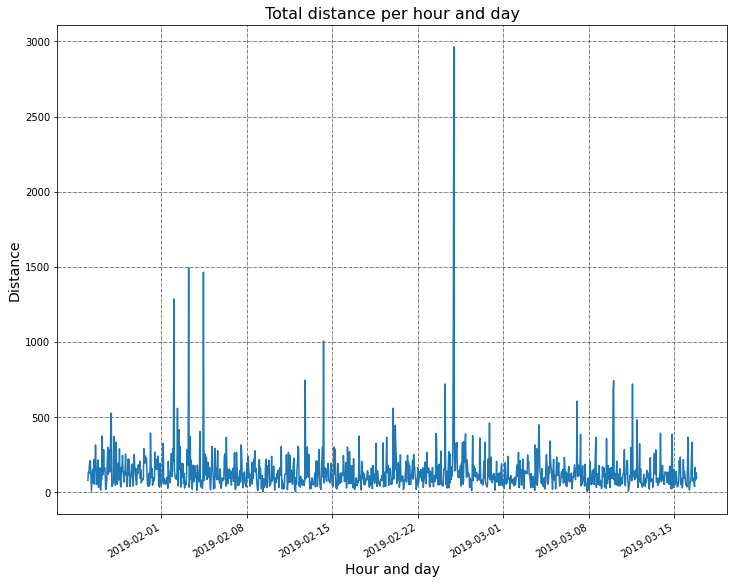

In [21]:
#plot the data 

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
grouped['DIST'].plot(figsize=(12, 10))

# Define the label for the title of the figure
plt.title("Total distance per hour and day", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Distance', fontsize=14)
plt.xlabel('Hour and day', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()


Data preparation for the use in the model

In [22]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [23]:
#check the total data 
print("Number of rows and columns:", grouped.shape)

Number of rows and columns: (1186, 1)


In [24]:
grouped

name,DIST
date,
2019-01-26 00:00:00,77.532026
2019-01-26 01:00:00,131.539642
2019-01-26 02:00:00,122.884597
2019-01-26 03:00:00,178.047047
2019-01-26 04:00:00,208.342804
...,...
2019-03-16 16:00:00,36.222702
2019-03-16 17:00:00,163.915518
2019-03-16 18:00:00,80.811524


In [25]:
al=grouped

In [26]:
grouped['date'] = grouped.index


In [27]:
grouped = grouped.reset_index(drop=True)


In [28]:
grouped

name,DIST,date
0,77.532026,2019-01-26 00:00:00
1,131.539642,2019-01-26 01:00:00
2,122.884597,2019-01-26 02:00:00
3,178.047047,2019-01-26 03:00:00
4,208.342804,2019-01-26 04:00:00
...,...,...
1181,36.222702,2019-03-16 16:00:00
1182,163.915518,2019-03-16 17:00:00
1183,80.811524,2019-03-16 18:00:00
1184,128.748363,2019-03-16 19:00:00



Divide the data into training (80%) and testing (20%) datasets.




In [29]:
#80% for training and 20% for testing
training_set = grouped.iloc[:950 , 0:1].values
test_set = grouped.iloc[950:, 0:1].values

In [30]:
test_set.shape

(236, 1)

In [31]:
training_set.shape

(950, 1)

**Model**

First, we normalize the data before model fitting (Min-Max Scaling using scikit-learn). The input will be transformed into the range [0,1] - all values will be within this range.
The normalization of the data can boost the performance.

The the input feature will be built with time lag of 70 time-steps. 

We will have to reshape the dat as well to a 3D format, as this is a requirement of the LSTM input layer.


In [32]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 70 time-steps and 1 output
X_train = []
y_train = []
for i in range(70, 950):
    X_train.append(training_set_scaled[i-70:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [33]:
X_train.shape

(880, 70, 1)

In [34]:
# Feature Scaling for test set 
sc = MinMaxScaler(feature_range = (0, 1))
test_set_scaled = sc.fit_transform(test_set)
# Creating a data structure with 70 time-steps and 1 output
X_test = []
y_test = []
for i in range(70, 236):
    X_test.append(test_set_scaled[i-70:i, 0])
    y_test.append(test_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [35]:
X_test.shape

(166, 70, 1)

We have now reshaped the data into the following format (#values, #time-steps, #1 dimensional output).

The LSTM model will learn a function that maps a sequence of past observations as input to an output observation

We built the LSTM with 50 neurons, 4 hidden layers and 1 neuron in the output layer. We used the mean squared error loss function and the Adam stochastic gradient descent optimizer.

In [36]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics="accuracy")

# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data=(X_test, y_test), verbose=1, shuffle=False)
#history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=20)], verbose=1, shuffle=False)

Epoch 1/100
28/28 [==============================] - 31s 480ms/step - loss: 0.0030 - accuracy: 0.0011 - val_loss: 0.0376 - val_accuracy: 0.0000e+00
Epoch 2/100
28/28 [==============================] - 10s 369ms/step - loss: 0.0029 - accuracy: 0.0011 - val_loss: 0.0343 - val_accuracy: 0.0000e+00
Epoch 3/100
28/28 [==============================] - 7s 264ms/step - loss: 0.0029 - accuracy: 0.0011 - val_loss: 0.0339 - val_accuracy: 0.0000e+00
Epoch 4/100
28/28 [==============================] - 8s 298ms/step - loss: 0.0028 - accuracy: 0.0011 - val_loss: 0.0339 - val_accuracy: 0.0000e+00
Epoch 5/100
28/28 [==============================] - 6s 202ms/step - loss: 0.0028 - accuracy: 0.0011 - val_loss: 0.0339 - val_accuracy: 0.0000e+00
Epoch 6/100
28/28 [==============================] - 8s 292ms/step - loss: 0.0029 - accuracy: 0.0011 - val_loss: 0.0339 - val_accuracy: 0.0000e+00
Epoch 7/100
28/28 [==============================] - 5s 196ms/step - loss: 0.0028 - accuracy: 0.0011 - val_loss: 0.0

In [37]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 70, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 70, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 70, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 70, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 70, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 70, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2


Prepare the test data (reshape them):



In [39]:
# Getting the predicted 
dataset_train = grouped.iloc[:950, 0:1]
dataset_test = grouped.iloc[950:, 0:1]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 70:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

In [40]:
for i in range(70, 236):
    X_test.append(inputs[i-70:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(166, 70, 1)


In [41]:
predicted_activity = model.predict(X_test)
predicted_activity = sc.inverse_transform(predicted_activity)

6/6 [==============================] - 5s 61ms/step


In [42]:
test_loss, test_accuracy = model.evaluate(X_test, batch_size=32)

6/6 [==============================] - 3s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


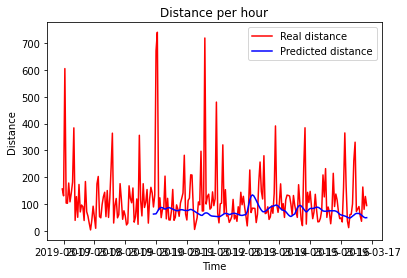

In [43]:
# Visualising the results
from matplotlib import pyplot as plt

plt.plot(grouped.loc[950:, "date"],dataset_test.values, color = "red", label = "Real distance")
plt.plot(grouped.loc[1020:, "date"],predicted_activity, color = "blue", label = "Predicted distance")
#plt.xticks(np.arange(0,40,50))
#plt.axis([100, 144, 0, 2000])
plt.title('Distance per hour')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.legend()
plt.show()

Visualizing the model loss plot 
Reference: https://stellargraph.readthedocs.io/en/stable/demos/time-series/gcn-lstm-time-series.html 

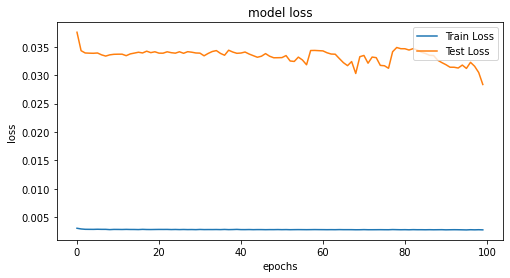

In [44]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [45]:
print(
    "Train loss: ",
    history.history["loss"][-1],
    "\nTest loss:",
    history.history["val_loss"][-1],
)

Train loss:  0.002755166729912162 
Test loss: 0.028357256203889847


In [ ]:
dataset_test.values.shape

In [ ]:
grouped.loc[890:, "date"].shape

In [ ]:
predicted_activity.shape

In [ ]:
grouped.loc[890:, "date"].shape